In [3]:
from quchem.Graph import *

In [4]:
from quchem.Hamiltonian_Generator_Functions import *


### Parameters
Molecule = 'H2'
geometry = [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]
num_shots = 10000
basis = 'sto-3g'


### Get Hamiltonian
Hamilt = Hamiltonian(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!
QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='JW')

In [5]:
QubitHamiltonianFrozen = tuple(frozenset((PauliStr, const) for op in QubitHamiltonian \
                                              for PauliStr, const in op.terms.items()))

## OpenFermion_Commutativity

In [11]:
from openfermion.ops import QubitOperator
Op1 = QubitOperator('Y0 X1 X2 X3', 0.5)
frozen_Op1 = tuple(*frozenset((PauliStr, const) for PauliStr, const in Op1.terms.items()))


Op2 = QubitOperator('Y0 X1 X2 Z3', 0.25j)
frozen_Op2 = tuple(*frozenset((PauliStr, const) for PauliStr, const in Op1.terms.items()))

comm_status = 'AC'

OpenFermion_Commutativity(frozen_Op1, frozen_Op2, comm_status)

False

In [8]:
Op1*Op2==Op2*Op1

False

## Openfermion_Build_Graph_Nodes

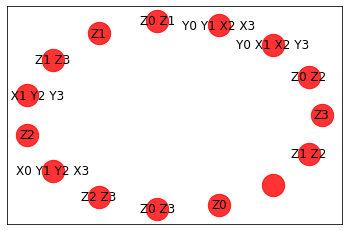

In [5]:
G = nx.Graph()

G = Openfermion_Build_Graph_Nodes(QubitHamiltonianFrozen, G, plot_graph=True)

## Openfermion_Build_Graph_Edges_COMMUTING_QWC_AntiCommuting

Building Graph Edges: 100%|##########| 15/15 [00:00<00:00, 1921.41it/s]
/home/lex/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


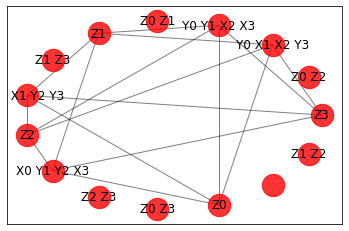

In [6]:
G = Openfermion_Build_Graph_Nodes(QubitHamiltonianFrozen, G, plot_graph=False)

commutativity_flag = 'AC'

G = Openfermion_Build_Graph_Edges_COMMUTING_QWC_AntiCommuting(G, QubitHamiltonianFrozen,
                                                                               commutativity_flag, plot_graph = True)

## Openfermion_Get_Complemenary_Graph

Building Graph Edges: 100%|##########| 15/15 [00:00<00:00, 1861.87it/s]


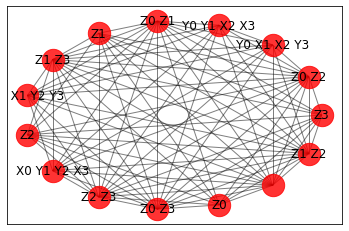

In [7]:
commutativity_flag = 'AC'
G=nx.Graph()
G = Openfermion_Build_Graph_Nodes(QubitHamiltonianFrozen, G, plot_graph=False)
G = Openfermion_Build_Graph_Edges_COMMUTING_QWC_AntiCommuting(G, QubitHamiltonianFrozen, commutativity_flag, plot_graph = False) 

G_comp = Openfermion_Get_Complemenary_Graph(G, plot_graph=True)

Building Graph Edges: 100%|##########| 15/15 [00:00<00:00, 1986.82it/s]


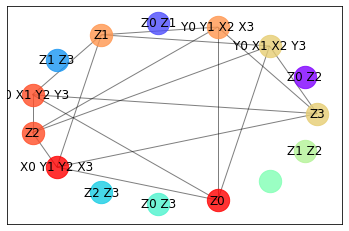

{0: [(((0, 'Z'), (2, 'Z')), (0.12062523481381837+0j))],
 1: [(((0, 'Z'), (1, 'Z')), (0.1686889816869329+0j))],
 2: [(((1, 'Z'), (3, 'Z')), (0.12062523481381837+0j))],
 3: [(((2, 'Z'), (3, 'Z')), (0.174412876106516+0j))],
 4: [(((0, 'Z'), (3, 'Z')), (0.16592785032250768+0j))],
 5: [((), (-0.09706626861762624+0j))],
 6: [(((1, 'Z'), (2, 'Z')), (0.16592785032250768+0j))],
 7: [(((3, 'Z'),), (-0.2234315367466397+0j)),
  (((0, 'Y'), (1, 'X'), (2, 'X'), (3, 'Y')), (0.04530261550868928+0j))],
 8: [(((0, 'Y'), (1, 'Y'), (2, 'X'), (3, 'X')), (-0.04530261550868928+0j)),
  (((1, 'Z'),), (0.171412826394024+0j))],
 9: [(((0, 'X'), (1, 'X'), (2, 'Y'), (3, 'Y')), (-0.04530261550868928+0j)),
  (((2, 'Z'),), (-0.2234315367466397+0j))],
 10: [(((0, 'X'), (1, 'Y'), (2, 'Y'), (3, 'X')), (0.04530261550868928+0j)),
  (((0, 'Z'),), (0.17141282639402405+0j))]}

In [8]:
commutativity_flag = 'AC'
G=nx.Graph()
G = Openfermion_Build_Graph_Nodes(QubitHamiltonianFrozen, G, plot_graph=False)
G = Openfermion_Build_Graph_Edges_COMMUTING_QWC_AntiCommuting(G, QubitHamiltonianFrozen, commutativity_flag, plot_graph = False) 


clique = Openfermion_Get_clique_cover(G, strategy='largest_first', plot_graph=True)
clique

## Get clique cover of qubit op

In [9]:
Convert_Clique_Cover_to_QubitOp(clique)

{0: [(0.12062523481381837+0j) [Z0 Z2]],
 1: [(0.1686889816869329+0j) [Z0 Z1]],
 2: [(0.12062523481381837+0j) [Z1 Z3]],
 3: [(0.174412876106516+0j) [Z2 Z3]],
 4: [(0.16592785032250768+0j) [Z0 Z3]],
 5: [(-0.09706626861762624+0j) []],
 6: [(0.16592785032250768+0j) [Z1 Z2]],
 7: [(-0.2234315367466397+0j) [Z3], (0.04530261550868928+0j) [Y0 X1 X2 Y3]],
 8: [(-0.04530261550868928+0j) [Y0 Y1 X2 X3], (0.171412826394024+0j) [Z1]],
 9: [(-0.04530261550868928+0j) [X0 X1 Y2 Y3], (-0.2234315367466397+0j) [Z2]],
 10: [(0.04530261550868928+0j) [X0 Y1 Y2 X3], (0.17141282639402405+0j) [Z0]]}

## Get clique cover of qubit op as strings

In [10]:
Convert_Clique_Cover_to_str(clique)

{0: [('Z0 Z2', (0.12062523481381837+0j))],
 1: [('Z0 Z1', (0.1686889816869329+0j))],
 2: [('Z1 Z3', (0.12062523481381837+0j))],
 3: [('Z2 Z3', (0.174412876106516+0j))],
 4: [('Z0 Z3', (0.16592785032250768+0j))],
 5: [('', (-0.09706626861762624+0j))],
 6: [('Z1 Z2', (0.16592785032250768+0j))],
 7: [('Z3', (-0.2234315367466397+0j)),
  ('Y0 X1 X2 Y3', (0.04530261550868928+0j))],
 8: [('Y0 Y1 X2 X3', (-0.04530261550868928+0j)),
  ('Z1', (0.171412826394024+0j))],
 9: [('X0 X1 Y2 Y3', (-0.04530261550868928+0j)),
  ('Z2', (-0.2234315367466397+0j))],
 10: [('X0 Y1 Y2 X3', (0.04530261550868928+0j)),
  ('Z0', (0.17141282639402405+0j))]}

# Class method

In [11]:
Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(QubitHamiltonian)

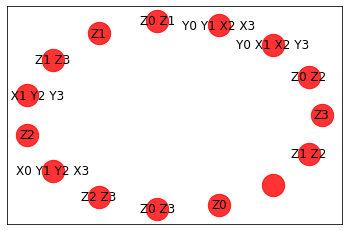

Building Graph Edges: 100%|##########| 15/15 [00:00<00:00, 1983.25it/s]


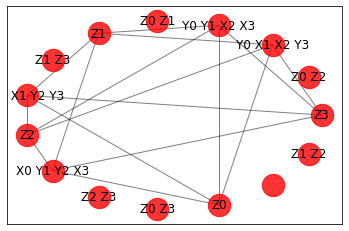

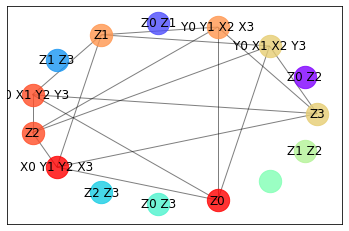

In [12]:
commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = True
Graph_colouring_strategy='largest_first'

set_defined_by_comm_flag = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)

# Looking at relationships between these sets!

In [13]:
from quchem.Hamiltonian_Generator_Functions import *


### HAMILTONIAN start
Molecule = 'LiH'
geometry = [('Li', (0., 0., 0.)), ('H', (0., 0., 1.45))]
num_shots = 10000
basis = 'sto-3g'


### Get Hamiltonian
Hamilt = Hamiltonian(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!
QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='JW')
### HAMILTONIAN end

### GRAPH start
Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(QubitHamiltonian)

commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = False
Graph_colouring_strategy='largest_first'

set_defined_by_comm_flag = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)

Building Graph Edges: 100%|##########| 631/631 [00:16<00:00, 37.20it/s] 


## Graph_of_two_sets

Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1151.65it/s]

['X1 Z2 X3 Z9', 'X1 Z2 Z3 Z4 X5 Z7', 'Z1 Z7', 'X1 Z2 Z3 Z4 Z5 Z6 Z7 Z8 Z10 X11']

['X0 Z1 Z2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 X10', 'X2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 X10', 'Z10', 'X4 Z5 Z6 Z7 Z8 Z9 X10', 'X8 X9 Y10 Y11', 'X5 Y6 Y7 Z8 Z9 X10', 'X1 Z2 Z3 Z4 Z5 Z6 Z7 Y8 Y9 X10', 'X3 Z4 Z5 Y6 Y7 Z8 Z9 X10']





/home/lex/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


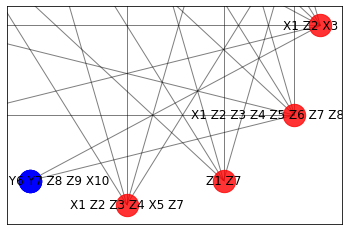

(<networkx.classes.graph.Graph at 0x7fa9d763eb90>, False)

In [14]:
anti_comm_QWC = 'C'
plot_graph = True

i=20
j=15
print([' '.join([t[1]+str(t[0]) for t in list(Op.terms.keys())[0]]) for Op in set_defined_by_comm_flag[i] ])
print('')
print([' '.join([t[1]+str(t[0]) for t in list(Op.terms.keys())[0]]) for Op in set_defined_by_comm_flag[j] ])

print('')
print('')
Graph_of_two_sets_CONNECTED(set_defined_by_comm_flag[i], set_defined_by_comm_flag[j], anti_comm_QWC, plot_graph=plot_graph)

##

## Get all subgraphs

Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1767.76it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1941.36it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1252.50it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1085.10it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1219.50it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 873.55it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1601.80it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1458.13it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 960.89it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 987.36it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 2124.77it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1073.35it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1222.68it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1505.13it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 764.46it/s]


Building Graph Edges: 100%|##########| 11/11 [00:00<00:00, 820.25it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1856.00it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1394.04it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 2987.93it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 2346.14it/s]


Building Graph Edges: 100%|##########| 3/3 [00:00<00:00, 3126.19it/s]


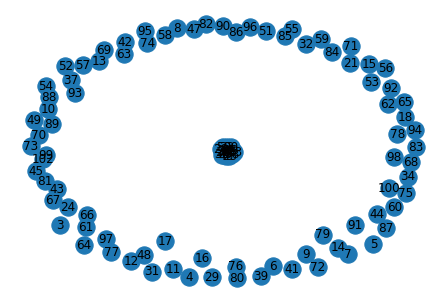

In [15]:
anti_comm_QWC='C'

GRAPH_key_nodes, single_nodes = Get_subgraph_of_sets(set_defined_by_comm_flag, anti_comm_QWC, plot_graph=True, plot_sub_graphs=False)

In [16]:
print(GRAPH_key_nodes.edges)

[(19, 20), (19, 23), (19, 25), (19, 28), (19, 33), (19, 36), (19, 38), (19, 46), (19, 50), (20, 22), (20, 26), (20, 27), (20, 30), (20, 35), (20, 40), (22, 23), (22, 25), (22, 28), (22, 33), (22, 36), (22, 38), (22, 46), (22, 50), (23, 26), (23, 27), (23, 30), (23, 35), (23, 40), (25, 26), (25, 27), (25, 30), (25, 35), (25, 40), (26, 28), (26, 33), (26, 36), (26, 38), (26, 46), (26, 50), (27, 28), (27, 33), (27, 36), (27, 38), (27, 46), (27, 50), (28, 30), (28, 35), (28, 40), (30, 33), (30, 36), (30, 38), (30, 46), (30, 50), (33, 35), (33, 40), (35, 36), (35, 38), (35, 46), (35, 50), (36, 40), (38, 40), (40, 46), (40, 50), (99, 102)]


In [17]:
taken_indices=[]
unqiue_terms =[]
for a,b in GRAPH_key_nodes.edges:
    if a not in taken_indices and b not in taken_indices:
        unqiue_terms.append((a,b))
        taken_indices.append(a)
        taken_indices.append(b)
print(len(unqiue_terms))
unqiue_terms

8


[(19, 20),
 (22, 23),
 (25, 26),
 (27, 28),
 (30, 33),
 (35, 36),
 (38, 40),
 (99, 102)]

Building Graph Edges: 100%|##########| 9/9 [00:00<00:00, 655.76it/s]

['X0 Z1 X2 X4 Z5 Z6 Z7 Z8 Z9 X10', 'Z0 Y4 Z5 Z6 Z7 Z8 Z9 Y10', 'Y0 Z1 Z2 Z3 Z5 Z6 Z7 Z8 Z9 Y10', 'Z1 Z10', 'Y2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 Y10 Z11', 'X1 Z2 X3 Z10', 'Y2 Z3 Z4 Y5 X10 X11', 'X1 Z2 Z3 Z4 X5 Z10', 'Y2 Y3 X10 X11']

['Z1 Z5', 'X1 Z2 X3 Z11', 'X1 Z2 Z4 Z5 Z6 Z7 Z8 Z9 Z10 X11', 'X1 Y2 Y8 X9', 'X2 X3 X5 Z6 Z7 Z8 Z9 X10', 'Y0 Z1 Y2 Y3 Z4 Y5', 'X2 X3 Y4 Y5', 'Z2 Y3 Z4 Y5']




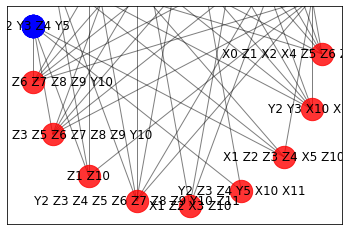

(<networkx.classes.graph.Graph at 0x7fa9d6d49fd0>, False)

In [18]:
# can check using:

anti_comm_QWC = 'C'
plot_graph = True

i=71
j=72
print([' '.join([t[1]+str(t[0]) for t in list(Op.terms.keys())[0]]) for Op in set_defined_by_comm_flag[i] ])
print('')
print([' '.join([t[1]+str(t[0]) for t in list(Op.terms.keys())[0]]) for Op in set_defined_by_comm_flag[j] ])

print('')
print('')
Graph_of_two_sets_CONNECTED(set_defined_by_comm_flag[i], set_defined_by_comm_flag[j], anti_comm_QWC, plot_graph=plot_graph)

Building Graph Edges:   0%|          | 0/6 [00:00<?, ?it/s]

No of terms in Hamiltonian reduced from 631 to 103 (reduction=528)


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 686.41it/s]


Building Graph Edges: 100%|##########| 9/9 [00:00<00:00, 1514.07it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1448.62it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 2332.92it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 2215.02it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1127.98it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1320.42it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1251.28it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 999.83it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1116.30it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1612.42it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 1449.41it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 944.45it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 1098.62it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1309.67it/s]


Building Graph Edges: 100%|##########| 9/9 [00:00<00:00, 1186.54it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 941.24it/s]


Building Graph Edges: 100%|##########| 9/9 [00:00<00:00, 1735.57it/s]


Building Graph Edges: 100%|##########| 9/9 [00:00<00:00, 2362.10it/s]


Building Graph Edges: 100%|##########| 9/9 [00:00<00:00, 2471.11it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 1779.96it/s]


Building Graph Edges: 100%|##########| 2/2 [00:00<00:00, 2691.24it/s]
/home/lex/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


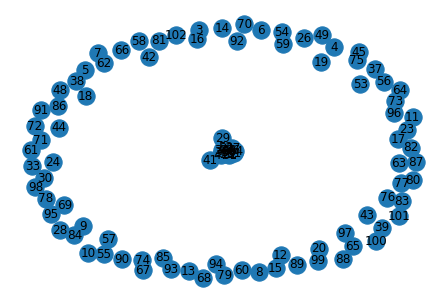

Number of completely commuting sets (non-unique) in reduced Hamiltonian:  58
Number of completely UNIQUE commuting sets in reduced Hamiltonian= 8
THESE can be measured SIMULTANEOUSLY
No of terms in reduced Hamiltonian reduced = 103 BUT only requires to 95 measurements


In [19]:
from quchem.Hamiltonian_Generator_Functions import *
### HAMILTONIAN start
Molecule = 'LiH'
geometry = [('Li', (0., 0., 0.)), ('H', (0., 0., 1.45))]
num_shots = 10000
basis = 'sto-3g'


### Get Hamiltonian
Hamilt = Hamiltonian(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!
QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='JW')
### HAMILTONIAN end

#####################################
### GRAPH start
Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(QubitHamiltonian)

commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = False
Graph_colouring_strategy='largest_first'

set_defined_by_comm_flag = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)



print('No of terms in Hamiltonian reduced from {} to {} (reduction={})'.format(len(Hamiltonian_graph_obj.QubitHamiltonianFrozen),
                                                                               len(set_defined_by_comm_flag),
                                                                               len(Hamiltonian_graph_obj.QubitHamiltonianFrozen)- len(set_defined_by_comm_flag)))



sub_graph_relationship = 'C'

SubGraph_of_set_keys, keys_of_single_QubitOp = Get_subgraph_of_sets(set_defined_by_comm_flag, sub_graph_relationship, plot_graph=True)

print('Number of completely commuting sets (non-unique) in reduced Hamiltonian: ', len(SubGraph_of_set_keys.edges))
## note edges show sets that completely commute
# GG has nodes of all qubitOps in AC_set_dict_list with length greater than 1

## get clique cover of sub graph AKA UNIQUE sets:
coloured_sub_graph = Openfermion_Get_clique_cover(SubGraph_of_set_keys)
## coloured_sub_graph shows what we do in experiment! WITH the single ops too: keys_of_single_QubitOp!!!
# NOTE coloured_sub_graph only contains terms with more than one qubitOperator


print('Number of completely UNIQUE commuting sets in reduced Hamiltonian= {}'.format(len([coloured_sub_graph[key] for key in coloured_sub_graph if len(coloured_sub_graph[key]) >1])))
print('THESE can be measured SIMULTANEOUSLY')

# print('Number of anti_commuting_set reductions that can be done SIMULTANEOUSLY:',
#       (len(AC_set_dict_list) - len(keys_of_single_QubitOp)) - len(
#           coloured_sub_graph))


# note coloured_sub_graph only contains indices of terms with more than one qubitOp in it...
# hence minus keys_of_single_QubitOp

# print('overall no. terms to measure: ', len(coloured_sub_graph) + len(keys_of_single_QubitOp))

print('No of terms in reduced Hamiltonian reduced = {} BUT only requires to {} measurements'.format(
    len(set_defined_by_comm_flag),
    len(coloured_sub_graph) + len(keys_of_single_QubitOp)))

In [20]:
print('No of terms in Hamiltonian reduced from {} to {} (reduction={})'.format(len(Hamiltonian_graph_obj.QubitHamiltonianFrozen),
                                                                               len(set_defined_by_comm_flag),
                                                                               len(Hamiltonian_graph_obj.QubitHamiltonianFrozen)- len(set_defined_by_comm_flag)))

print('Number of completely commuting sets (non-unique) in reduced Hamiltonian: ', len(SubGraph_of_set_keys.edges))
      
print('Number of completely UNIQUE commuting sets in reduced Hamiltonian= {}'.format(len([coloured_sub_graph[key] for key in coloured_sub_graph if len(coloured_sub_graph[key]) >1])))
print('THESE can be measured SIMULTANEOUSLY')
      
print('No of terms in reduced Hamiltonian reduced = {} BUT only requires to {} measurements'.format(
    len(set_defined_by_comm_flag),
    len(coloured_sub_graph) + len(keys_of_single_QubitOp)))

No of terms in Hamiltonian reduced from 631 to 103 (reduction=528)
Number of completely commuting sets (non-unique) in reduced Hamiltonian:  58
Number of completely UNIQUE commuting sets in reduced Hamiltonian= 8
THESE can be measured SIMULTANEOUSLY
No of terms in reduced Hamiltonian reduced = 103 BUT only requires to 95 measurements


In [21]:
print('single terms')
print(keys_of_single_QubitOp)

print('')
print('each key gives keys of sets that can be measured at same time!')
coloured_sub_graph

single terms
[0, 1, 2]

each key gives keys of sets that can be measured at same time!


{0: [3],
 1: [4],
 2: [5],
 3: [6],
 4: [7],
 5: [8],
 6: [9],
 7: [10],
 8: [11],
 9: [12],
 10: [13],
 11: [14],
 12: [15],
 13: [16],
 14: [17],
 15: [18],
 16: [19],
 17: [20],
 18: [23],
 19: [24],
 20: [26],
 21: [28],
 22: [30],
 23: [33],
 24: [37],
 25: [38],
 26: [39],
 27: [42],
 28: [43],
 29: [44],
 30: [45],
 31: [48],
 32: [49],
 33: [53],
 34: [54],
 35: [55],
 36: [56],
 37: [57],
 38: [58],
 39: [59],
 40: [60],
 41: [61],
 42: [62],
 43: [63],
 44: [64],
 45: [65],
 46: [66],
 47: [67],
 48: [68],
 49: [69],
 50: [70],
 51: [71],
 52: [72],
 53: [73],
 54: [74],
 55: [75],
 56: [76],
 57: [77],
 58: [78],
 59: [79],
 60: [80],
 61: [81],
 62: [82],
 63: [83],
 64: [84],
 65: [85],
 66: [86],
 67: [87],
 68: [88],
 69: [89],
 70: [90],
 71: [91],
 72: [92],
 73: [93],
 74: [94],
 75: [95],
 76: [96],
 77: [97],
 78: [98],
 79: [99],
 80: [100],
 81: [101],
 82: [102],
 83: [29, 52],
 84: [41, 47],
 85: [27, 21],
 86: [31, 22],
 87: [32, 25],
 88: [34, 46],
 89: [35, 5

In [22]:
taken_indices=[]
unqiue_terms =[]
for a,b in SubGraph_of_set_keys.edges:
    if a not in taken_indices and b not in taken_indices:
        unqiue_terms.append((a,b))
        taken_indices.append(a)
        taken_indices.append(b)
print(len(unqiue_terms))
unqiue_terms

8


[(21, 27),
 (22, 31),
 (25, 32),
 (29, 52),
 (34, 46),
 (35, 50),
 (36, 51),
 (41, 47)]

In [28]:
# can check using:

anti_comm_QWC = 'C'
plot_graph = True

i=21
j=27
print([' '.join([t[1]+str(t[0]) for t in list(Op.terms.keys())[0]]) for Op in set_defined_by_comm_flag[i] ])
print('')
print([' '.join([t[1]+str(t[0]) for t in list(Op.terms.keys())[0]]) for Op in set_defined_by_comm_flag[j] ])

print('')
print('')
Graph_of_two_sets_CONNECTED(set_defined_by_comm_flag[i], set_defined_by_comm_flag[j], anti_comm_QWC, plot_graph=plot_graph)

KeyError: 21

# Class method!

In [24]:
red_Ham = Hamiltonian_Graph_reduction(QubitHamiltonian, 'AC', Graph_colouring_strategy='largest_first',
                 plot_qubit_Hamiltonian_relation_graph=False)

Building Graph Edges: 100%|##########| 631/631 [00:17<00:00, 36.40it/s] 


In [25]:
Coloured_graph_of_subgraph_set_keys, keys_of_single_QubitOps = red_Ham.Get_Coloured_graph_of_subgraphs('C')

Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1862.20it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1125.94it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 2360.00it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1658.40it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1167.45it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1947.60it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1510.10it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 2242.54it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1377.21it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1733.78it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1527.05it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 2455.11it/s]


Building Graph Edges: 100%|##########| 4/4 [00:00<00:00, 1217.95it/s]


Building Graph Edges: 100%|##########| 6/6 [00:00<00:00, 1553.83it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 1414.32it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1426.88it/s]


Building Graph Edges: 100%|##########| 8/8 [00:00<00:00, 1577.70it/s]


Building Graph Edges: 100%|##########| 9/9 [00:00<00:00, 1238.80it/s]


Building Graph Edges: 100%|##########| 7/7 [00:00<00:00, 1673.32it/s]


Building Graph Edges: 100%|##########| 9/9 [00:00<00:00, 1188.79it/s]


Building Graph Edges: 100%|##########| 5/5 [00:00<00:00, 3011.85it/s]


Building Graph Edges: 100%|##########| 2/2 [00:00<00:00, 1955.84it/s]


No of terms in Hamiltonian reduced from 631 to 103 (reduction=528)
Number of completely commuting sets (non-unique) in reduced Hamiltonian:  58
Number of completely UNIQUE commuting sets in reduced Hamiltonian= 8
THESE can be measured SIMULTANEOUSLY
No of terms in reduced Hamiltonian reduced = 103 BUT only requires to 95 measurements


### Checking with H2

Building Graph Edges: 100%|##########| 2/2 [00:00<00:00, 3018.57it/s]

No of terms in Hamiltonian reduced from 15 to 11 (reduction=4)


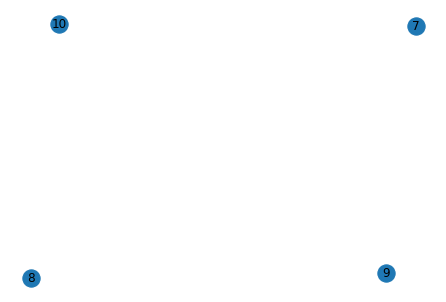

Number of completely commuting sets (non-unique) in reduced Hamiltonian:  0
Number of completely UNIQUE commuting sets in reduced Hamiltonian= 0
THESE can be measured SIMULTANEOUSLY
No of terms in reduced Hamiltonian reduced = 11 BUT only requires to 11 measurements

key defines which sets can be measured at same time! {0: [7], 1: [8], 2: [9], 3: [10]}


In [26]:
from quchem.Hamiltonian_Generator_Functions import *
### HAMILTONIAN start
Molecule = 'H2'
geometry = [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]
num_shots = 10000
basis = 'sto-3g'


### Get Hamiltonian
Hamilt = Hamiltonian(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!
QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='JW')
### HAMILTONIAN end

#####################################
### GRAPH start
Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(QubitHamiltonian)

commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = False
Graph_colouring_strategy='largest_first'

set_defined_by_comm_flag = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)



print('No of terms in Hamiltonian reduced from {} to {} (reduction={})'.format(len(Hamiltonian_graph_obj.QubitHamiltonianFrozen),
                                                                               len(set_defined_by_comm_flag),
                                                                               len(Hamiltonian_graph_obj.QubitHamiltonianFrozen)- len(set_defined_by_comm_flag)))



sub_graph_relationship = 'C'

SubGraph_of_set_keys, keys_of_single_QubitOp = Get_subgraph_of_sets(set_defined_by_comm_flag, sub_graph_relationship, plot_graph=True)

print('Number of completely commuting sets (non-unique) in reduced Hamiltonian: ', len(SubGraph_of_set_keys.edges))
## note edges show sets that completely commute
# GG has nodes of all qubitOps in AC_set_dict_list with length greater than 1

## get clique cover of sub graph AKA UNIQUE sets:
coloured_sub_graph = Openfermion_Get_clique_cover(SubGraph_of_set_keys)
## coloured_sub_graph shows what we do in experiment! WITH the single ops too: keys_of_single_QubitOp!!!
# NOTE coloured_sub_graph only contains terms with more than one qubitOperator


print('Number of completely UNIQUE commuting sets in reduced Hamiltonian= {}'.format(len([coloured_sub_graph[key] for key in coloured_sub_graph if len(coloured_sub_graph[key]) >1])))
print('THESE can be measured SIMULTANEOUSLY')

# print('Number of anti_commuting_set reductions that can be done SIMULTANEOUSLY:',
#       (len(AC_set_dict_list) - len(keys_of_single_QubitOp)) - len(
#           coloured_sub_graph))


# note coloured_sub_graph only contains indices of terms with more than one qubitOp in it...
# hence minus keys_of_single_QubitOp

# print('overall no. terms to measure: ', len(coloured_sub_graph) + len(keys_of_single_QubitOp))

print('No of terms in reduced Hamiltonian reduced = {} BUT only requires to {} measurements'.format(
    len(set_defined_by_comm_flag),
    len(coloured_sub_graph) + len(keys_of_single_QubitOp)))

print('')
print('key defines which sets can be measured at same time!', coloured_sub_graph)

In [27]:
taken_indices=[]
unqiue_terms =[]
for a,b in SubGraph_of_set_keys.edges:
    if a not in taken_indices and b not in taken_indices:
        unqiue_terms.append((a,b))
        taken_indices.append(a)
        taken_indices.append(b)
print(len(unqiue_terms))
unqiue_terms

0


[]